# Music genre detection

![title](https://www.labibleurbaine.com/wp-content/uploads/2018/07/LindseyStirling-Montreal-2018-1-610x350.jpg)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Context :

**Two datasets :**

- First with two classes : 1 - pop / 2 - classical

- Second with ten classes : blues, classical, country, disco, hiphop, jazz, metal, pop, reggae & rock

## Description of datas :

**tempo :** The speed at which a passage of music is played

**beats :**  Rythmic unit in music

**chroma_stft :** _Short Time Fourier Transform (spectral shape)

**rmse__Root :** Mean Square Error

**spectral_centroid :** Indicates where the "center of mass" of the spectrum is located.

**spectral_bandwidthIt :**  is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value

**rolloff :** Roll-off is the steepness of a transmission function with frequency

**zero_crossing_rate :** The rate at which the signal changes from positive to negative or back

**mfcc1_Mel-frequency :** cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.

## Data exploration on the two classes dataset

In [4]:
df = pd.read_csv('data_2genre.csv')

In [5]:
#Check Series
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [6]:
#Dataset shape
print(f'{df.shape[0]} observations, {df.shape[1]} features')

200 observations, 30 features


In [7]:
df.dtypes

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                   int64
dtype: object

In [8]:
df.label.value_counts()

2    100
1    100
Name: label, dtype: int64

In [9]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,119.896118,55.605000,0.330516,0.121342,2213.827679,2264.973183,4568.788040,0.105623,-193.933982,104.612778,...,-0.181143,-1.285880,-0.717986,-0.499806,0.035002,-0.100388,0.549379,-0.108176,-0.379320,1.500000
std,30.112891,15.691722,0.084184,0.092350,985.867013,798.344395,2323.849307,0.042441,149.931065,42.927715,...,4.754908,4.217877,4.261599,3.761752,4.102517,3.894046,3.680286,3.271097,3.431767,0.501255
min,58.726918,18.000000,0.181161,0.005276,690.075902,897.994319,749.062137,0.031538,-552.064063,32.351664,...,-15.805227,-17.465421,-11.930792,-10.189898,-13.840137,-10.179055,-11.975698,-9.139271,-8.060386,1.000000
25%,99.384014,46.000000,0.258248,0.031874,1347.129607,1521.334572,2475.832946,0.072016,-315.171960,64.449632,...,-3.148961,-4.074475,-3.471445,-2.810213,-2.440365,-2.362097,-1.965310,-2.155562,-2.827388,1.000000
50%,112.347147,53.000000,0.319846,0.115266,1978.153346,2282.710723,4096.850227,0.098227,-160.977130,103.129688,...,-0.138695,-1.225230,-0.644514,-0.476842,-0.374491,-0.347750,0.584017,-0.132256,-0.385403,1.500000
75%,135.999178,63.250000,0.404738,0.203261,3142.027145,3051.903827,6879.118820,0.136022,-52.513953,142.466745,...,2.623939,1.877754,1.808364,1.506955,2.272164,2.148825,2.479095,2.041620,1.701538,2.000000
max,234.907670,117.000000,0.522647,0.398012,4225.662023,3509.578677,8676.405868,0.230045,24.490849,190.791967,...,18.226380,8.493653,18.161663,12.357588,11.609025,11.489994,15.379257,14.686910,11.511355,2.000000


In [10]:
# Check NA values fo each Series
for col in df.select_dtypes('float64').columns:
    print(f'Na value for {col} series')
    print(df[col].isna().value_counts())

Na value for tempo series
False    200
Name: tempo, dtype: int64
Na value for chroma_stft series
False    200
Name: chroma_stft, dtype: int64
Na value for rmse series
False    200
Name: rmse, dtype: int64
Na value for spectral_centroid series
False    200
Name: spectral_centroid, dtype: int64
Na value for spectral_bandwidth series
False    200
Name: spectral_bandwidth, dtype: int64
Na value for rolloff series
False    200
Name: rolloff, dtype: int64
Na value for zero_crossing_rate series
False    200
Name: zero_crossing_rate, dtype: int64
Na value for mfcc1 series
False    200
Name: mfcc1, dtype: int64
Na value for mfcc2 series
False    200
Name: mfcc2, dtype: int64
Na value for mfcc3 series
False    200
Name: mfcc3, dtype: int64
Na value for mfcc4 series
False    200
Name: mfcc4, dtype: int64
Na value for mfcc5 series
False    200
Name: mfcc5, dtype: int64
Na value for mfcc6 series
False    200
Name: mfcc6, dtype: int64
Na value for mfcc7 series
False    200
Name: mfcc7, dtype: int64


## Series scaterplots

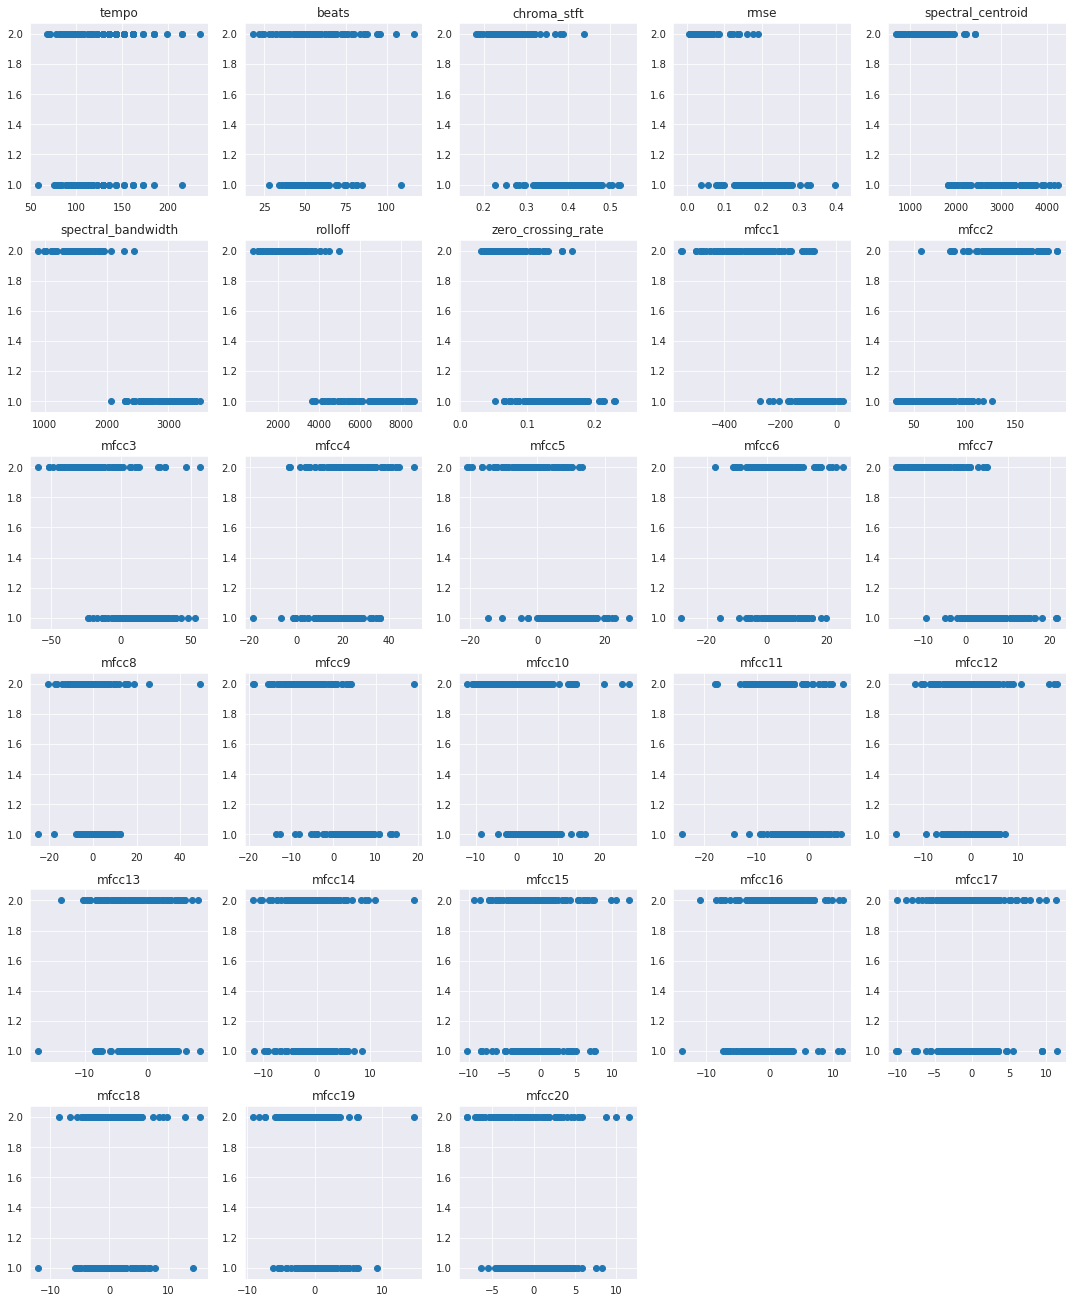

In [11]:
# fix a graph size
plt.figure(figsize=(15, 30), constrained_layout=False)

x = 0
for col in df.columns[1:-1]:
    x += 1
    plt.subplot(10, 5, x)
    plt.scatter(df[col], df["label"])
    plt.title(col)

# Put a spacing between graphs
plt.tight_layout()

plt.show()

## Series boxplots

Check if outliers exist for each Series

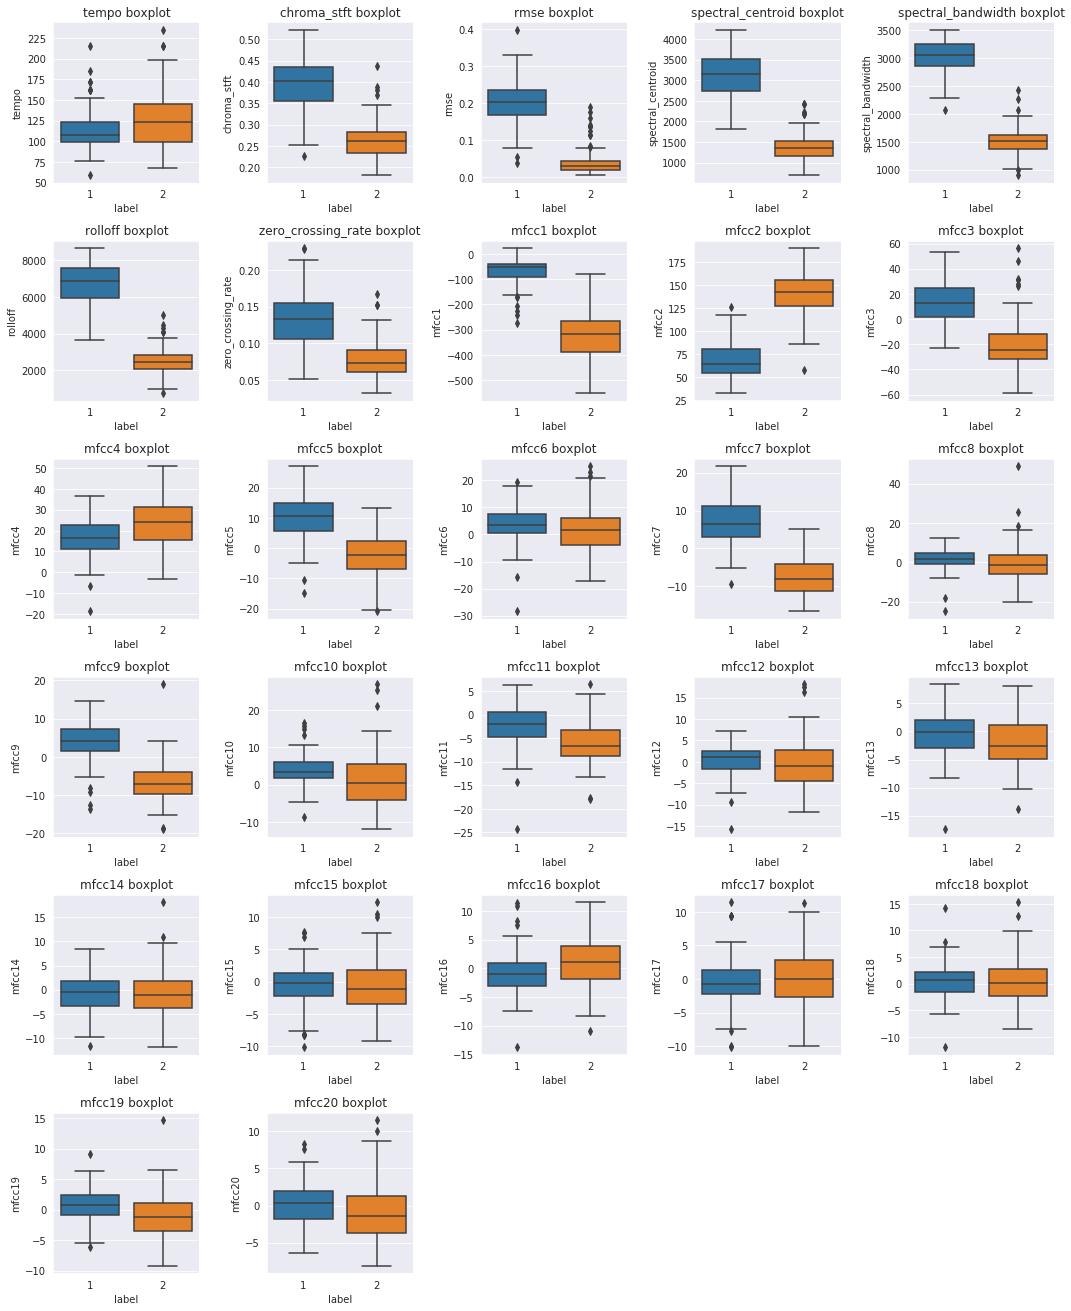

In [20]:
plt.figure(figsize=(15, 30), constrained_layout=False)

x = 0
for col in df.select_dtypes('float64').columns:
    x += 1
    plt.subplot(10, 5, x)
    sns.boxplot(x= 'label', y= col ,data=df)
    plt.title(f'{col} boxplot')

plt.tight_layout() 

plt.show()

## Distributions

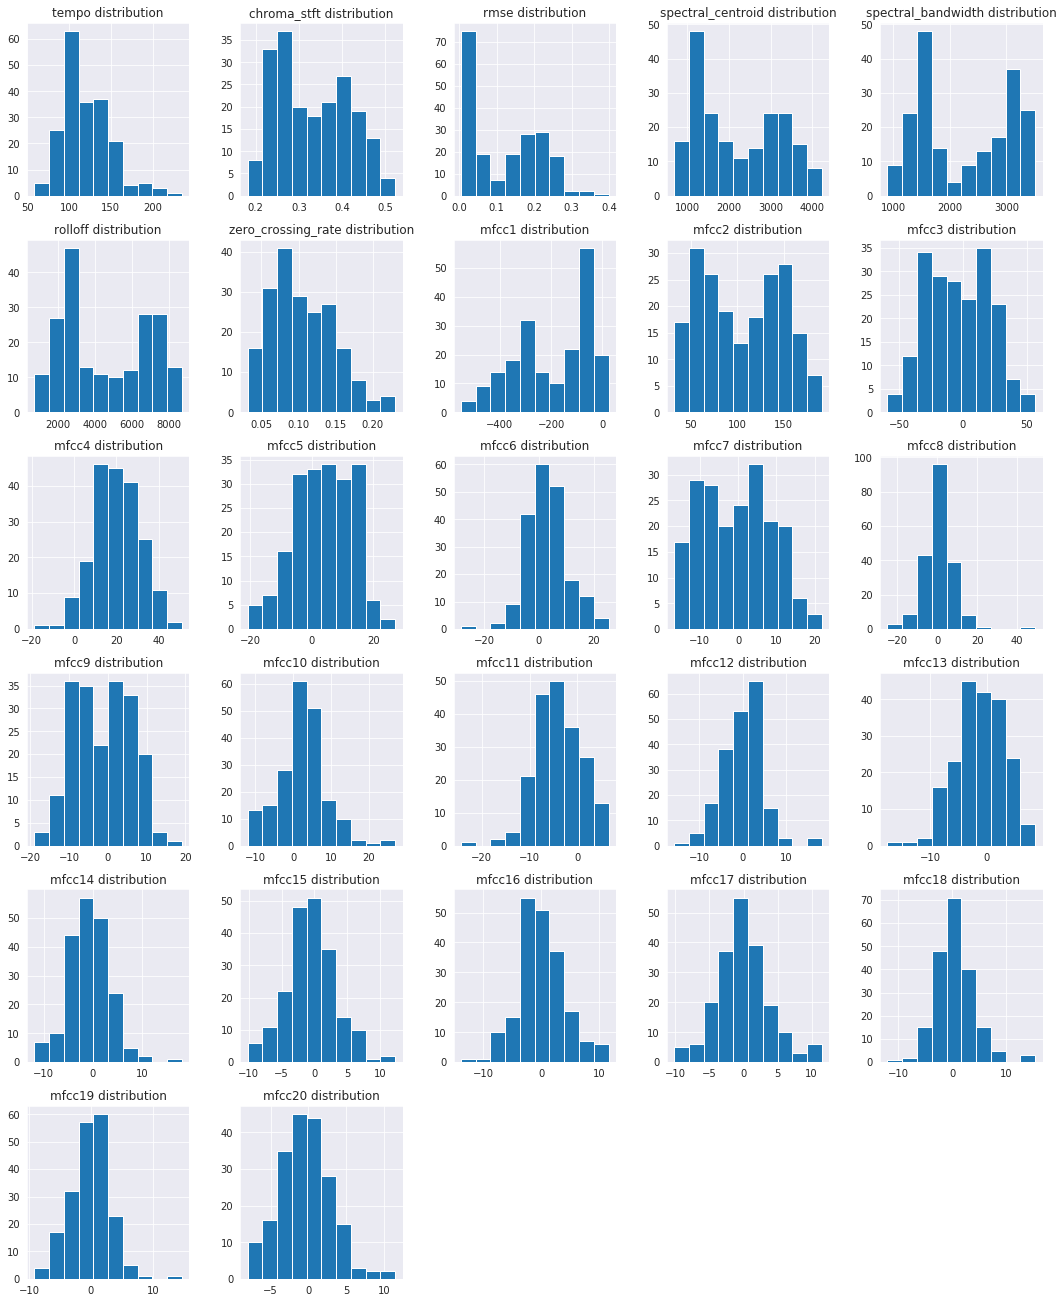

In [22]:
plt.figure(figsize=(15, 30), constrained_layout=False)

x = 0
for col in df.select_dtypes('float64').columns:
    
    x += 1
    plt.subplot(10, 5, x)
    
    plt.hist(x = col, data = df)
    plt.title(f'{col} distribution')

plt.tight_layout() 
    
plt.show()

 ## Features correlation

We are trying to find which features are correlated in order to pick the right ones to train the model

In [26]:
correlations = df.corr() * 100

cleanning_mask = np.zeros_like(correlations)
upper_triangle = np.triu_indices_from(correlations)
cleanning_mask[upper_triangle] = 1

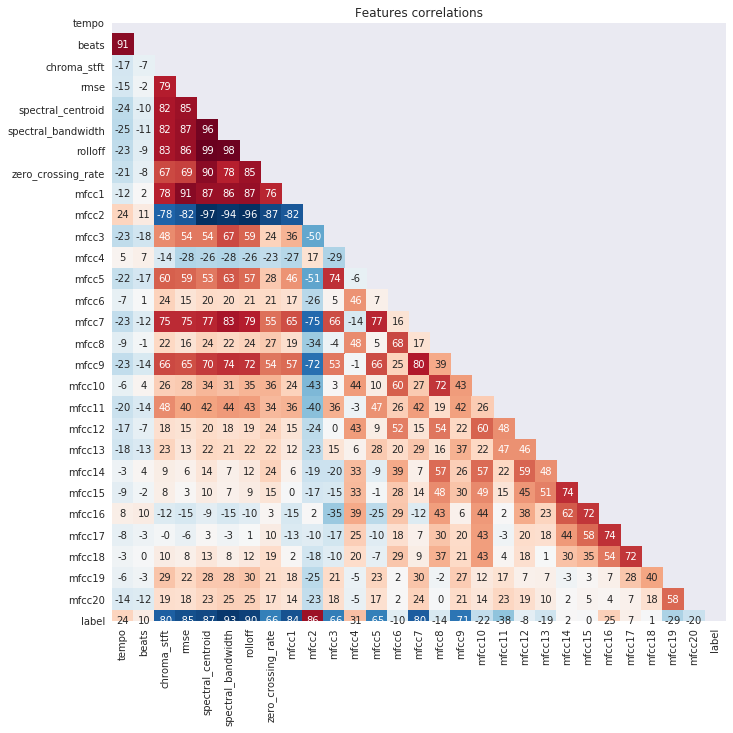

In [28]:
# display correlation matrix

plt.figure(figsize=(11,11))
sns.heatmap( correlations, cmap = 'RdBu_r', mask = cleanning_mask, annot=True, fmt='.0f', cbar=False )
plt.title('Features correlations')
plt.show()

Observations:
we realize that  many features are highly correlated. However since we couldn't explain the meaning of the various features, we decided to keep all of them and see how it goes

## Fit  model on the binary dataset

In [29]:
# Separating target from features
X = df.drop(['label', 'filename'], axis = 1)
y = df.label
y = y - 1

In [30]:
# Splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.label)

In [31]:
# Creating classifier with a pipeline for extra preprocessing
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel='linear', C=1, probability=True))

In [32]:
# Fitting the model
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### Evaluation

In [36]:
scores = cross_val_score(clf, X, y, cv=5, error_score = 'raise')

In [37]:
scores

array([1.   , 1.   , 0.975, 0.975, 0.975])

In [38]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.02)


#### ROC CURVE

In [40]:
pred_proba = clf.predict_proba(X_test)
pred_proba = [ p[1] for p in pred_proba]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

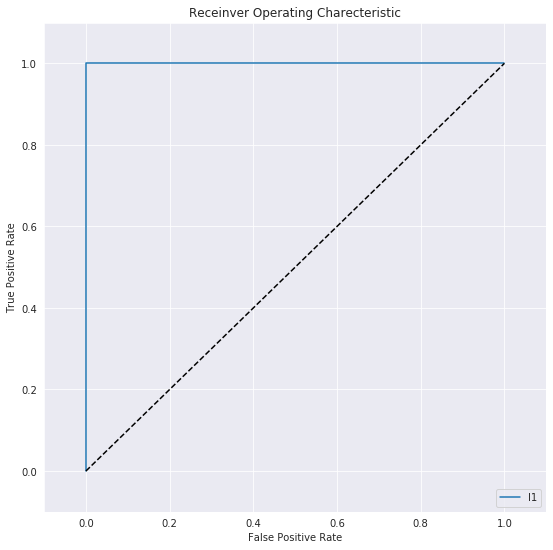

In [41]:
# Plot Roc Curve
fig = plt.figure(figsize=(9,9))
plt.title('Receinver Operating Charecteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1], [0,1], 'k--')

# Axes limits and labels
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Fit models on all genre dataset 

In [42]:
df_all = pd.read_csv('./data.csv')

In [43]:
df_all.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [44]:
df_all.dtypes

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

### Box plot by Series / label

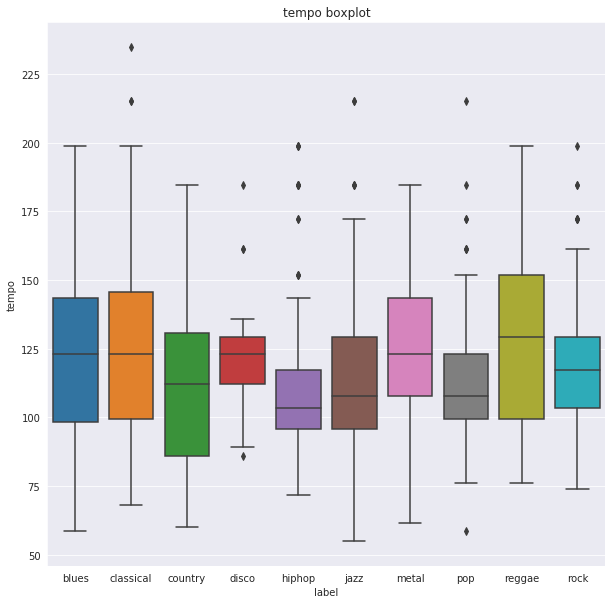

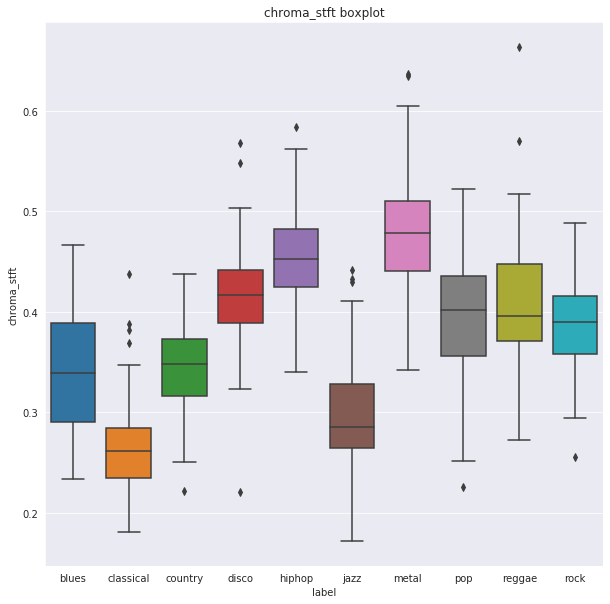

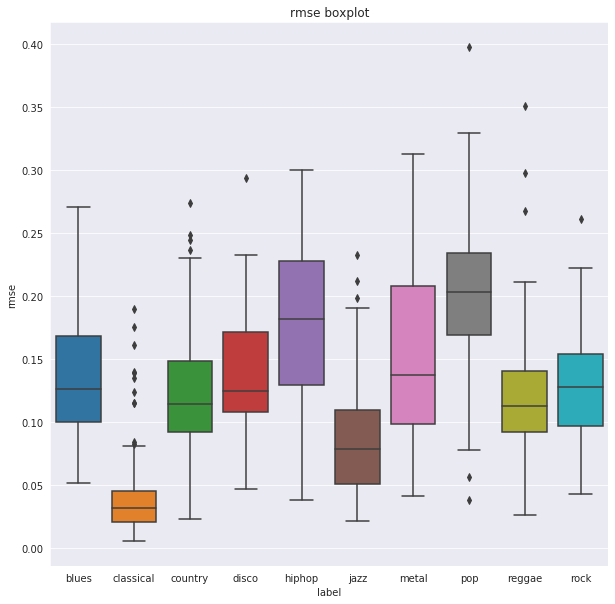

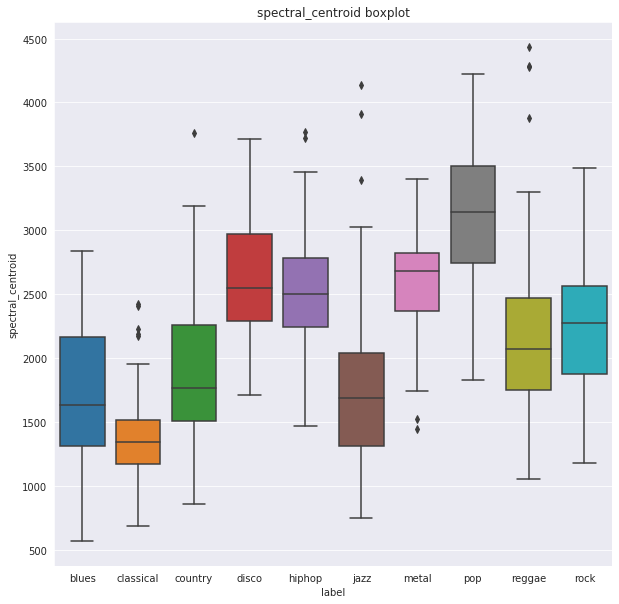

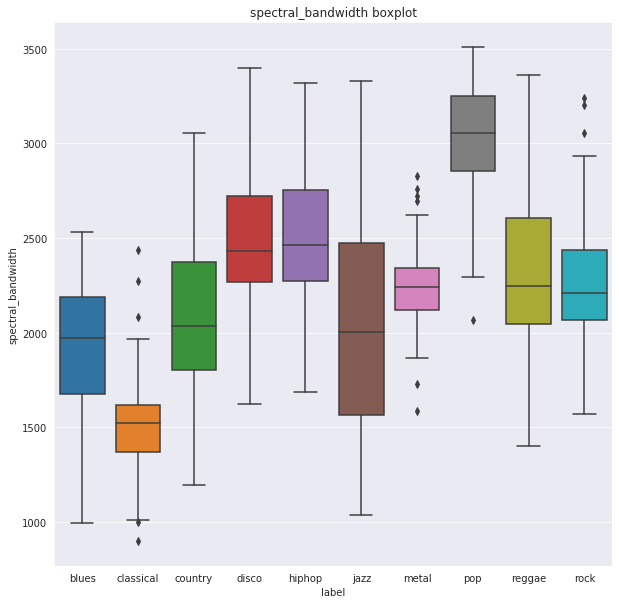

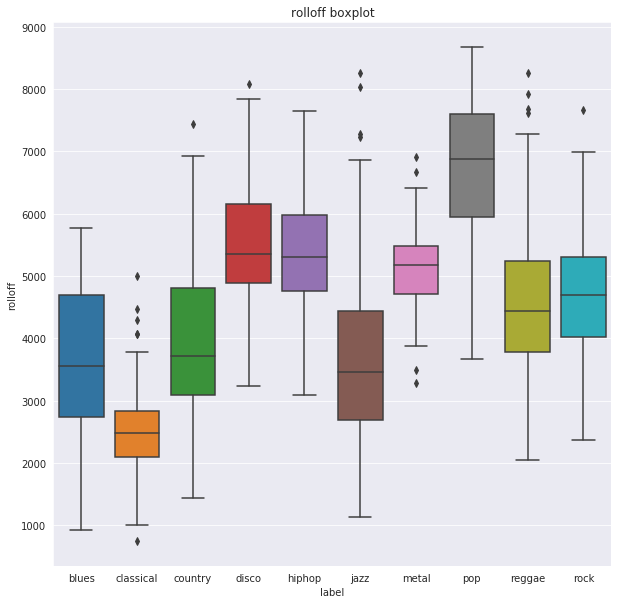

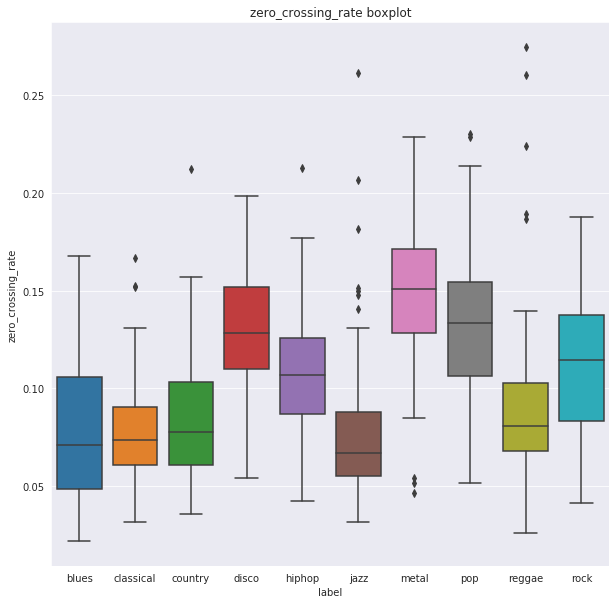

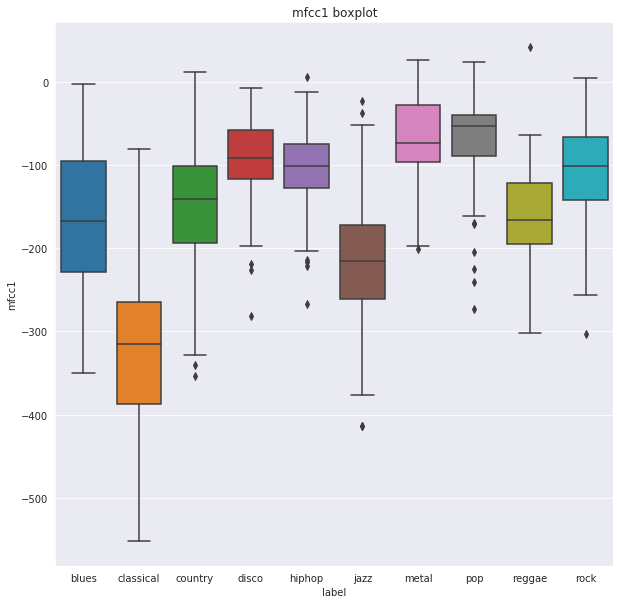

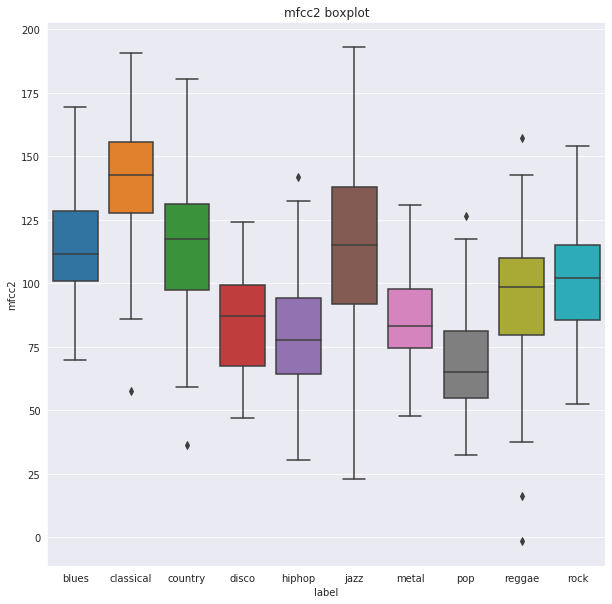

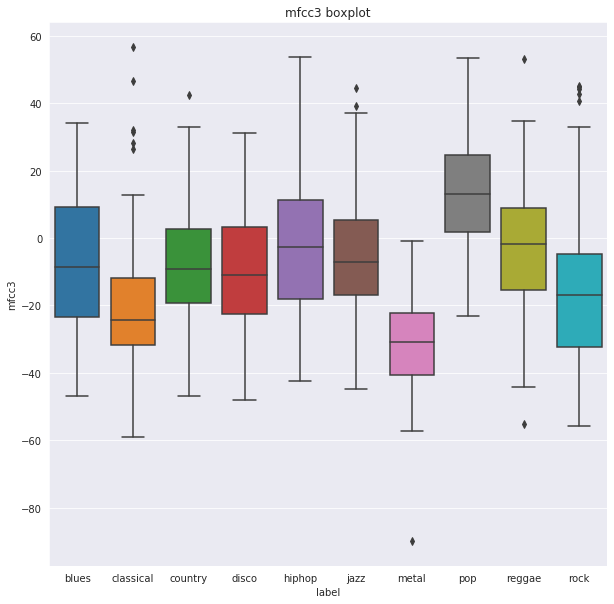

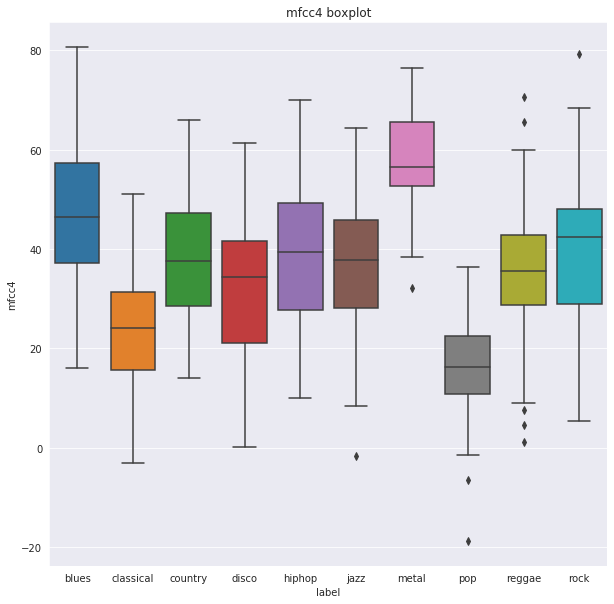

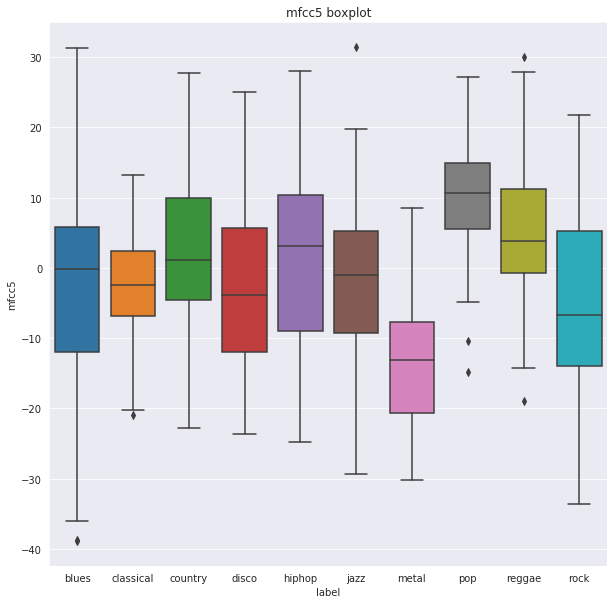

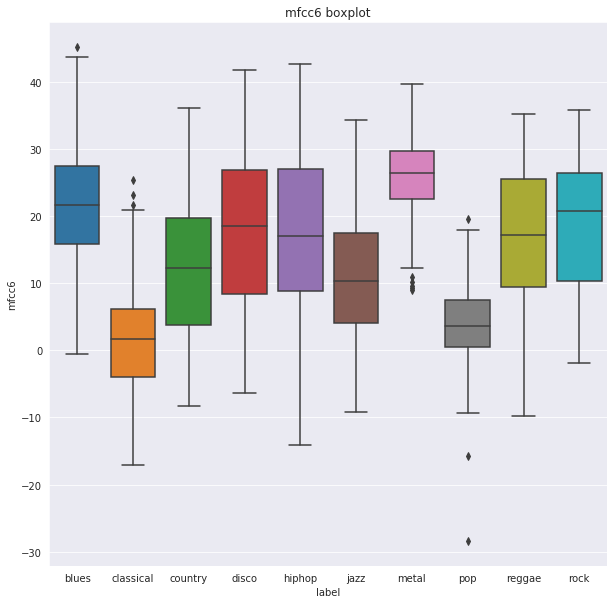

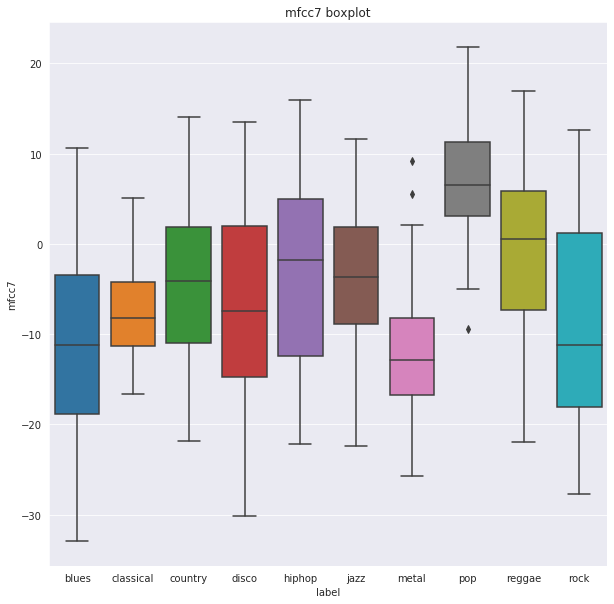

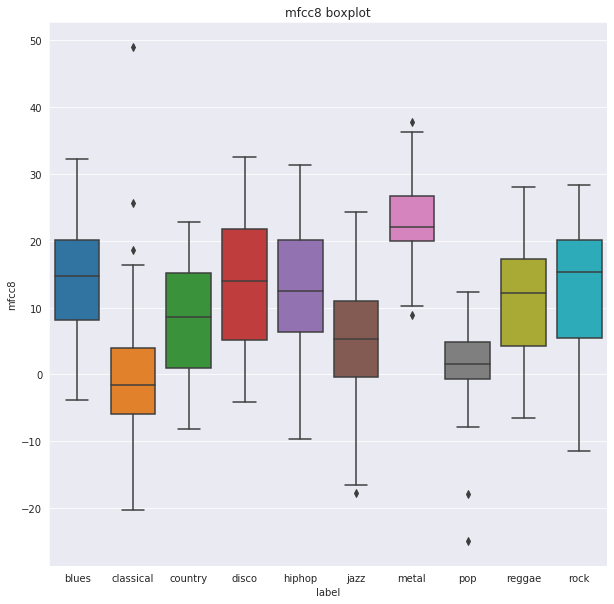

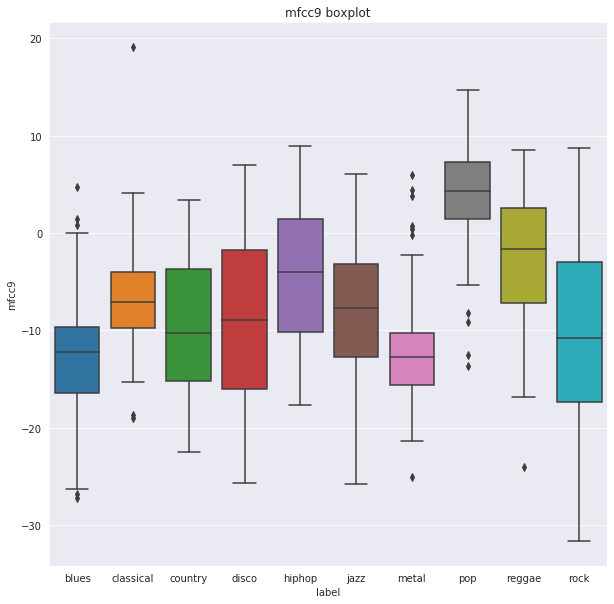

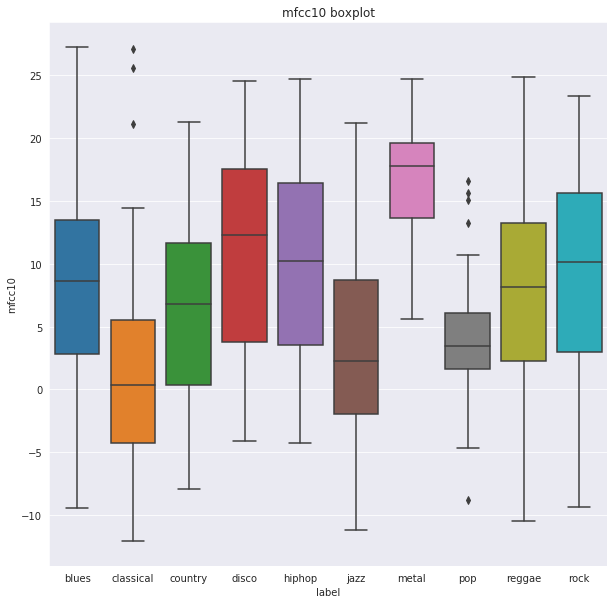

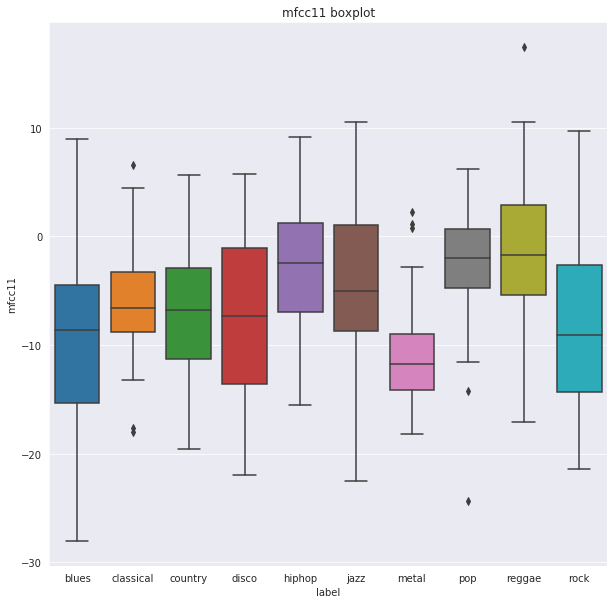

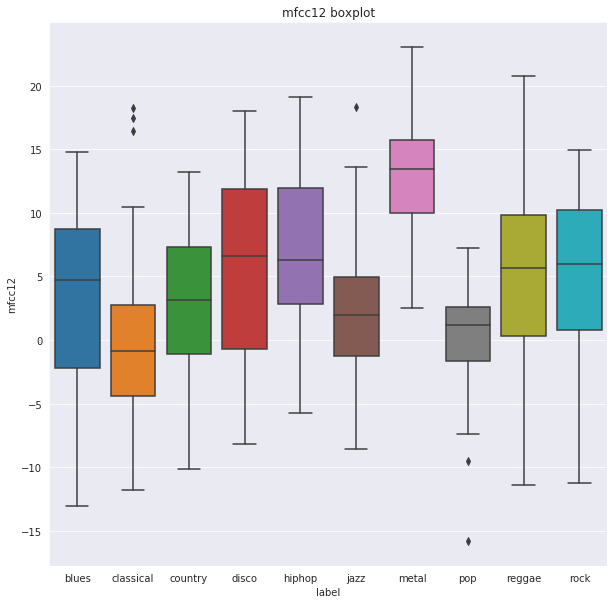

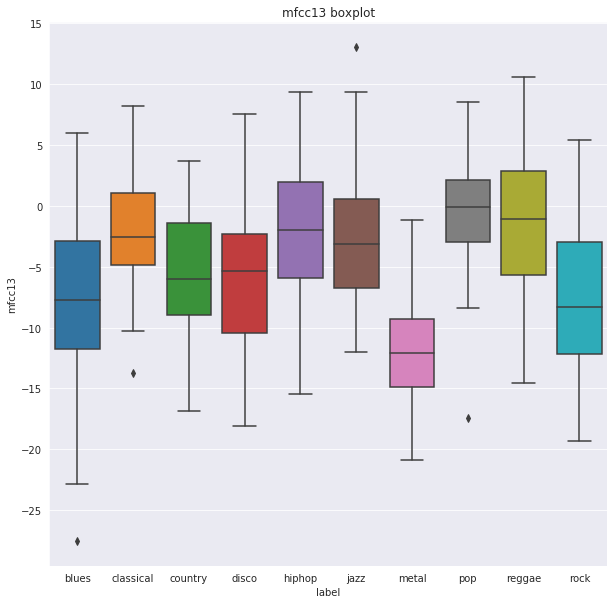

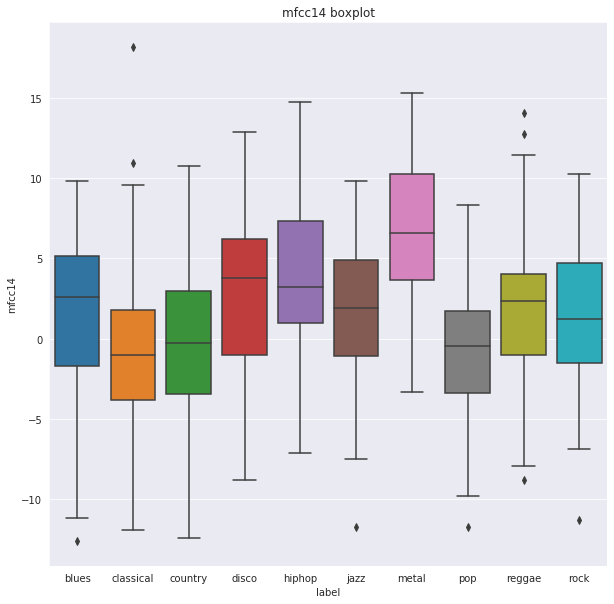

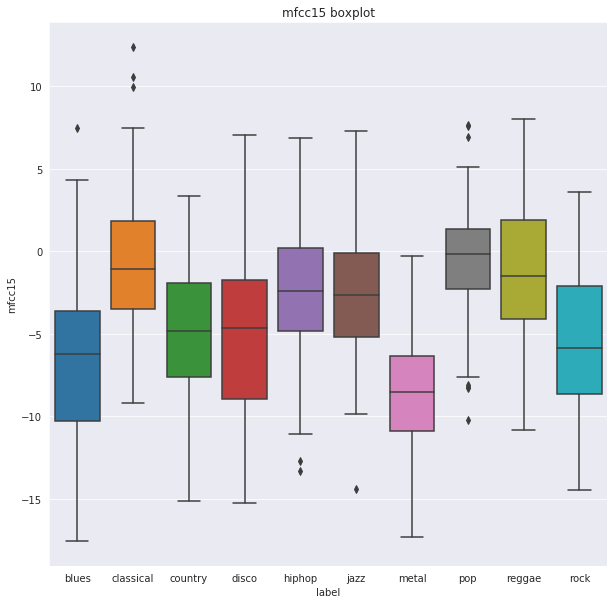

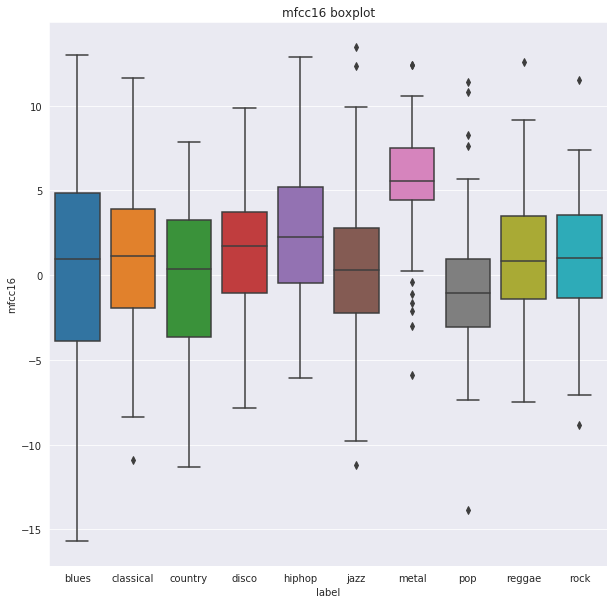

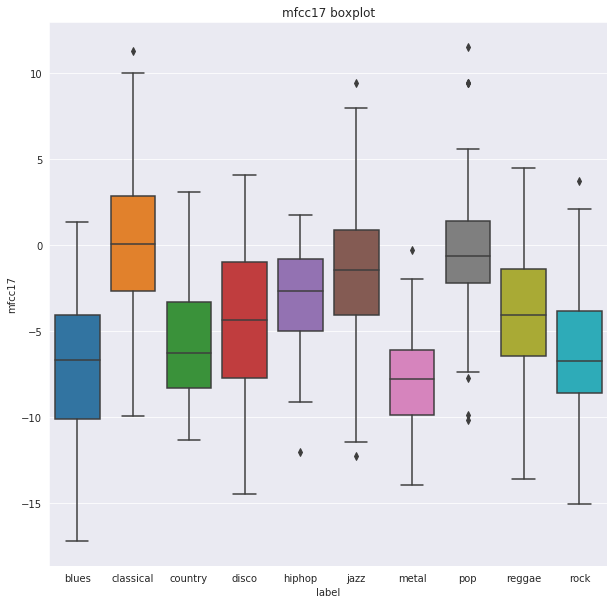

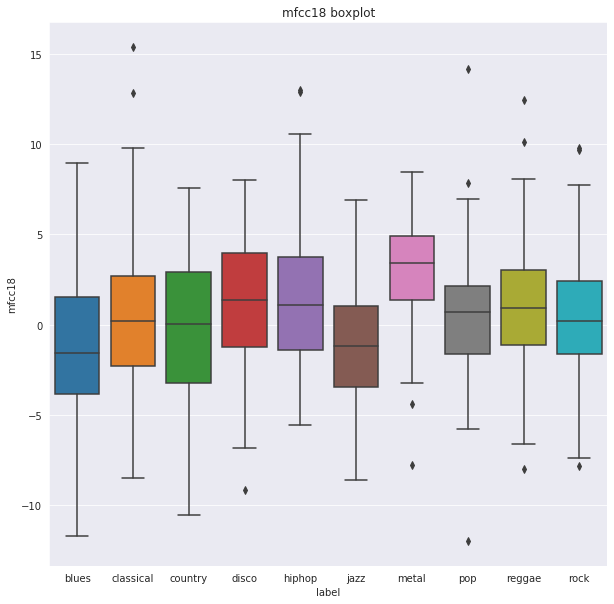

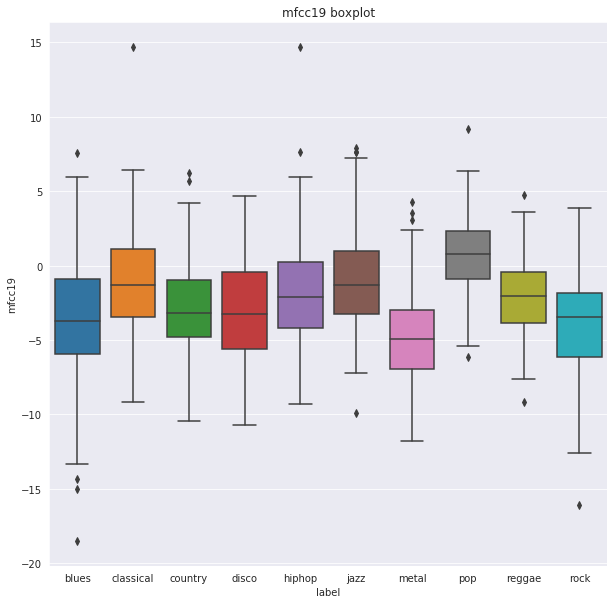

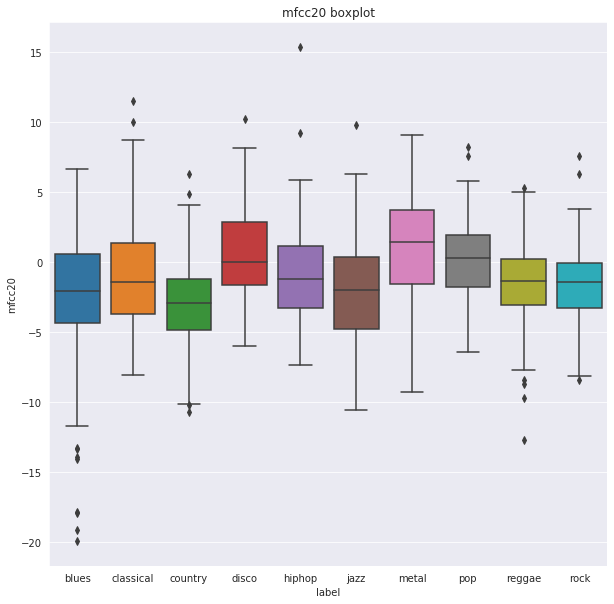

In [45]:
for col in df_all.select_dtypes('float64').columns:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x= 'label', y= col ,data=df_all)
    plt.title(f'{col} boxplot')
    plt.show()

### Series dispersion 

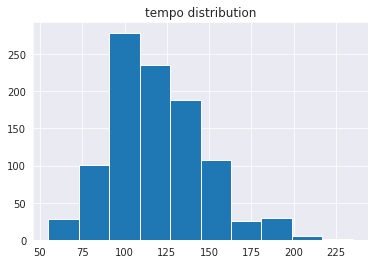

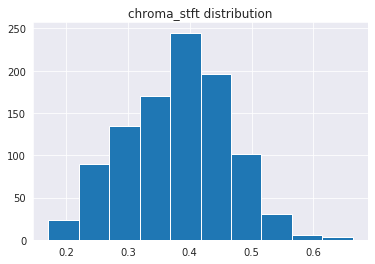

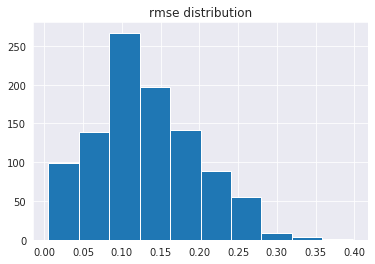

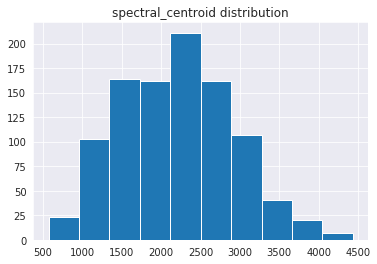

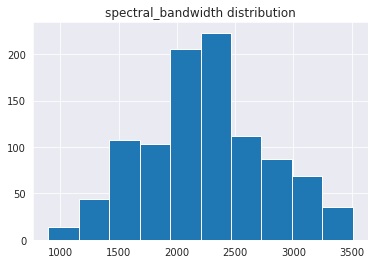

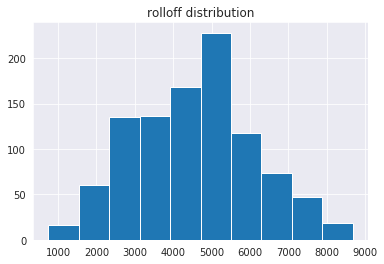

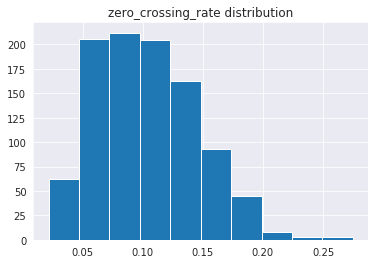

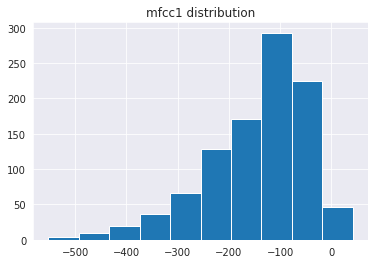

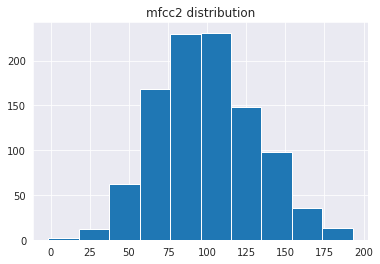

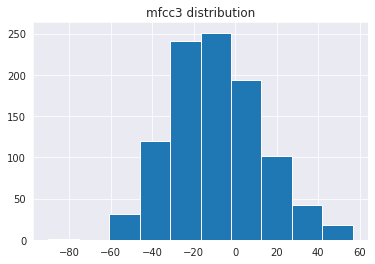

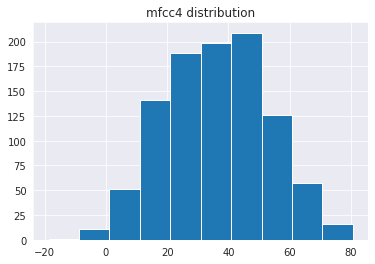

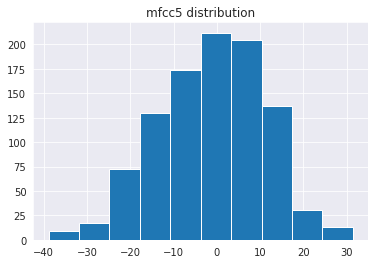

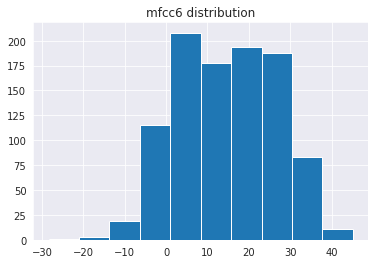

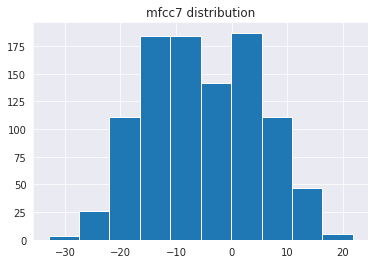

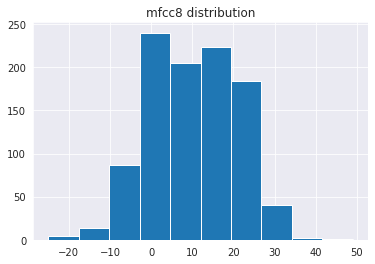

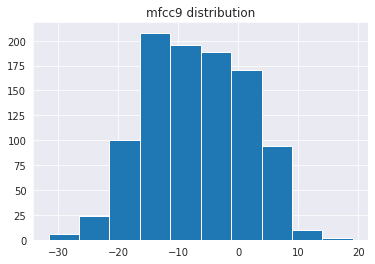

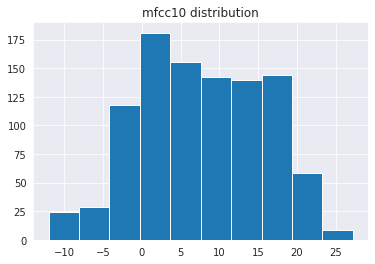

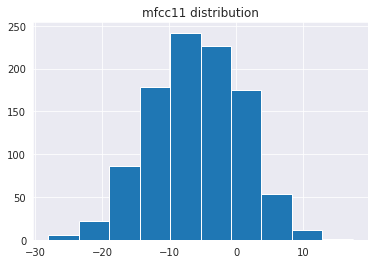

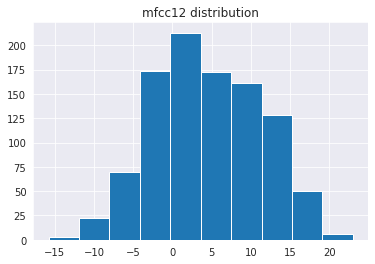

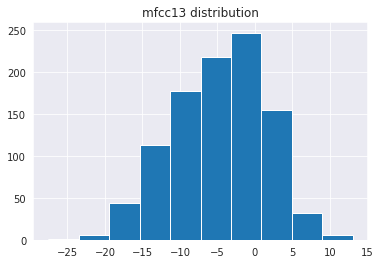

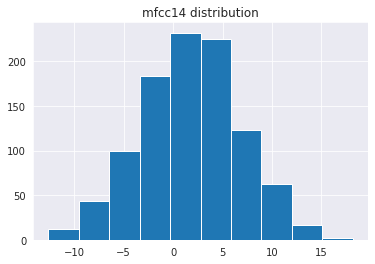

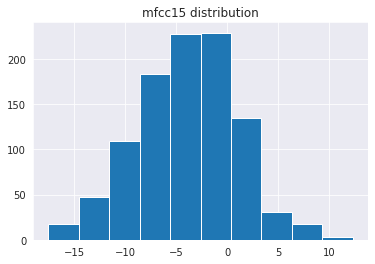

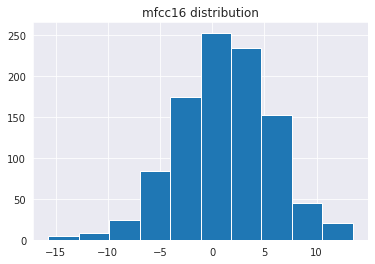

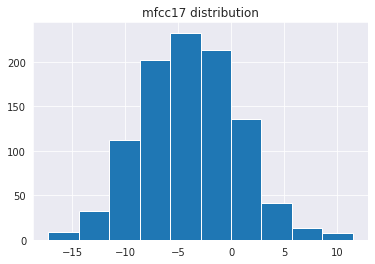

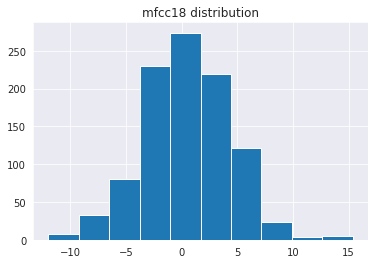

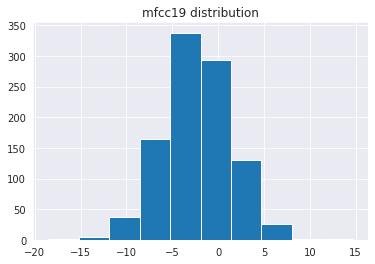

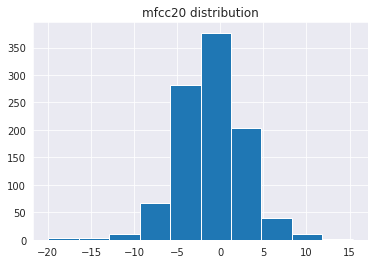

In [46]:
for col in df_all.select_dtypes('float64').columns:
    plt.hist(x = col, data = df_all)
    plt.title(f'{col} distribution')
    plt.show()

### Correlation matrix plot

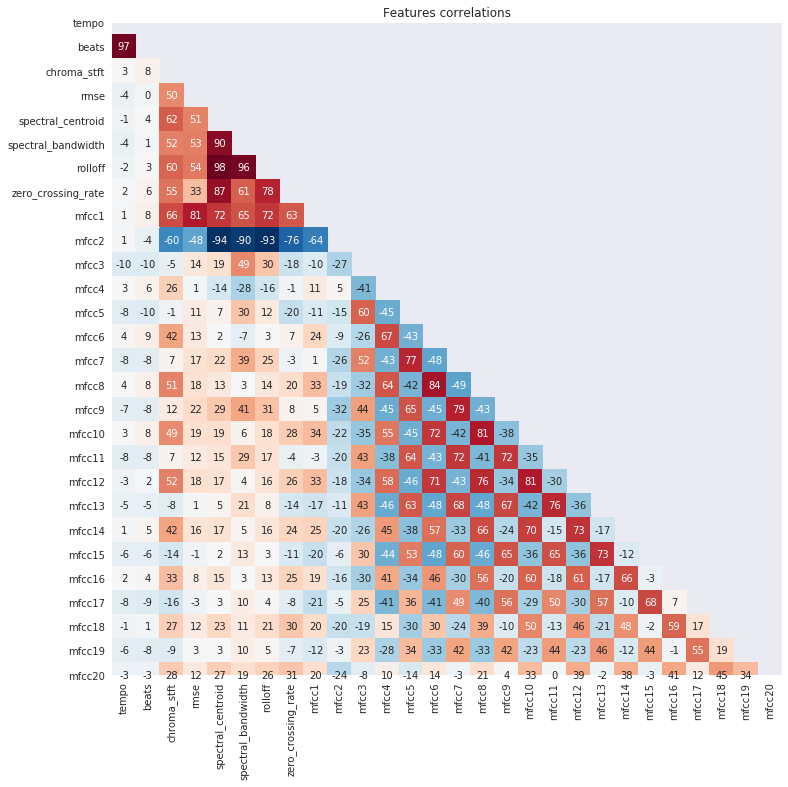

In [49]:
correlations = df_all.corr() * 100
cleanning_mask = np.zeros_like(correlations)
upper_triangle = np.triu_indices_from(correlations)
cleanning_mask[upper_triangle] = 1
plt.figure(figsize=(12,12))
sns.heatmap( correlations, cmap = 'RdBu_r', mask = cleanning_mask, annot=True, fmt='.0f', cbar=False )
plt.title('Features correlations')
plt.show()

### Fiting models with differents kernels

#### Linear kernel

In [50]:
X = df_all.drop(['label', 'filename'], axis = 1)
y = df_all.label

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df_all.label)

In [52]:
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel='linear', C=1, probability=True))

In [53]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [54]:
scores = cross_val_score(clf, X, y, cv=5, error_score = 'raise')

In [55]:
scores

array([0.62 , 0.675, 0.645, 0.635, 0.62 ])

In [56]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.04)


In [57]:
pred = clf.predict(X_test)
confusion_matrix(y_test, pred)

array([[13,  0,  1,  1,  0,  2,  2,  0,  1,  0],
       [ 0, 18,  0,  0,  0,  1,  0,  0,  1,  0],
       [ 2,  0, 11,  2,  0,  3,  0,  0,  1,  1],
       [ 1,  0,  2,  7,  2,  0,  1,  3,  1,  3],
       [ 0,  0,  1,  2, 11,  1,  0,  0,  5,  0],
       [ 2,  3,  3,  0,  0, 11,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  0,  0, 17,  0,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0, 18,  0,  0],
       [ 0,  1,  2,  1,  2,  1,  0,  2, 10,  1],
       [ 3,  0,  1,  2,  0,  1,  3,  1,  2,  7]])

#### LinearSVC

In [58]:
clf_linear_svc =  make_pipeline(preprocessing.StandardScaler(), svm.LinearSVC(C=1, penalty = 'l2', max_iter = 5000))

In [59]:
clf_linear_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=5000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [60]:
scores = cross_val_score(clf_linear_svc, X, y, cv=5, error_score = 'raise')

In [61]:
scores

array([0.58 , 0.635, 0.655, 0.605, 0.655])

In [62]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.06)


 ### rbf kernel

In [63]:
clf_rbf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1, probability=True))

In [64]:
clf_rbf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [65]:
scores = cross_val_score(clf_rbf, X, y, cv=5, error_score = 'raise')

In [66]:
scores

array([0.625, 0.65 , 0.62 , 0.68 , 0.665])

In [67]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.05)


In [68]:
pred = clf_rbf.predict(X_test)
confusion_matrix(y_test, pred)

array([[13,  0,  1,  1,  0,  3,  2,  0,  0,  0],
       [ 0, 17,  2,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0, 10,  2,  1,  2,  0,  1,  0,  2],
       [ 0,  0,  3,  7,  4,  0,  0,  1,  0,  5],
       [ 1,  0,  0,  1, 12,  0,  1,  1,  4,  0],
       [ 0,  3,  1,  0,  0, 14,  0,  0,  2,  0],
       [ 2,  0,  0,  1,  0,  0, 17,  0,  0,  0],
       [ 0,  1,  2,  0,  1,  0,  0, 16,  0,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  1, 11,  4],
       [ 4,  0,  2,  3,  0,  0,  2,  1,  1,  7]])

#### Polynomial kernel

In [69]:
clf_poly = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel = 'poly', C=1, probability=True))

In [70]:
clf_poly.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [71]:
scores = cross_val_score(clf_poly, X, y, cv=5, error_score = 'raise')

In [72]:
scores

array([0.61 , 0.615, 0.615, 0.65 , 0.58 ])

In [73]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.04)


In [74]:
pred = clf_poly.predict(X_test)
confusion_matrix(y_test, pred)

array([[10,  0,  2,  1,  1,  3,  1,  0,  2,  0],
       [ 0, 17,  2,  0,  0,  0,  0,  0,  1,  0],
       [ 2,  0, 13,  2,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  2,  5,  3,  0,  0,  1,  3,  6],
       [ 0,  0,  2,  0, 12,  1,  0,  0,  5,  0],
       [ 0,  2,  3,  0,  0, 12,  0,  0,  3,  0],
       [ 2,  0,  0,  0,  2,  0, 15,  0,  0,  1],
       [ 0,  0,  1,  1,  0,  1,  0, 16,  1,  0],
       [ 0,  0,  3,  1,  1,  1,  0,  0, 12,  2],
       [ 0,  0,  3,  2,  0,  0,  2,  1,  1, 11]])

#### Sigmoid kernel

In [75]:
clf_sigmoid = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel = 'sigmoid', C=1, probability=True))

In [76]:
clf_sigmoid.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='sigmoid', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [77]:
scores = cross_val_score(clf_sigmoid, X, y, cv=5, error_score = 'raise')

In [78]:
scores

array([0.455, 0.49 , 0.44 , 0.43 , 0.48 ])

In [79]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.46 (+/- 0.05)


In [80]:
pred = clf_sigmoid.predict(X_test)
confusion_matrix(y_test, pred)

array([[ 7,  1,  5,  1,  0,  4,  2,  0,  0,  0],
       [ 0, 15,  1,  0,  0,  4,  0,  0,  0,  0],
       [ 5,  1,  6,  0,  0,  2,  2,  2,  1,  1],
       [ 4,  0,  4,  3,  1,  0,  3,  3,  0,  2],
       [ 0,  0,  2,  1,  8,  0,  2,  3,  4,  0],
       [ 2,  3,  4,  0,  0,  9,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  1,  2,  0,  0,  0,  0, 17,  0,  0],
       [ 5,  2,  1,  2,  0,  0,  1,  2,  7,  0],
       [ 9,  0,  3,  1,  0,  1,  3,  1,  1,  1]])

### Check best hyper paramaters for rbf kernel

In [81]:
# Create list of hyperparametes to fit the model with
tuned_parameters = [{'svc__kernel': ['rbf'], 'svc__gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                     'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}]

In [85]:
# Creating classifier
clf_rbf_final= make_pipeline(preprocessing.StandardScaler(), 
                             svm.SVC(C=0.0001, 
                             gamma=1e-4, 
                             probability=True, 
                             random_state= 1234))

In [86]:
# Instanciating GridsearchCV
model = GridSearchCV(clf_rbf_final, tuned_parameters, cv= 5, n_jobs= -1)

In [87]:
# Fitting the model
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=0.0001, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.0001,
                                            kernel='rbf', max_iter=-1,
                                            probability=True, random_state=1234,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                 

In [88]:
# Getting. best params
model.best_params_

{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [90]:
# New classifier with best parameters found from gridsearchCV
best_clf_rbf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel = 'rbf', C=100, gamma = 0.01))

In [91]:
# Fit model 
best_clf_rbf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.01,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [92]:
# Getting the scores
scores = cross_val_score(best_clf_rbf, X, y, cv=5, error_score = 'raise')

In [93]:
scores

array([0.665, 0.705, 0.68 , 0.68 , 0.715])

In [94]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.04)


In [95]:
pred = best_clf_rbf.predict(X_test)
confusion_matrix(y_test, pred)

array([[13,  0,  1,  1,  0,  2,  1,  0,  2,  0],
       [ 0, 18,  0,  0,  0,  1,  0,  0,  1,  0],
       [ 3,  0,  9,  1,  0,  3,  0,  2,  0,  2],
       [ 0,  0,  1, 11,  3,  1,  0,  2,  0,  2],
       [ 1,  0,  1,  0, 15,  0,  0,  0,  3,  0],
       [ 1,  1,  1,  0,  0, 16,  0,  0,  1,  0],
       [ 2,  0,  0,  1,  2,  0, 15,  0,  0,  0],
       [ 0,  1,  3,  0,  1,  0,  0, 14,  1,  0],
       [ 0,  1,  3,  1,  2,  1,  0,  1, 10,  1],
       [ 3,  0,  1,  4,  0,  1,  1,  1,  3,  6]])

In [96]:
pred = best_clf_rbf.predict(X_test)

In [97]:
best_clf_rbf.score(X_test,y_test)

0.635